In [22]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Загрузка датасета Boston Housing
boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data
y = boston.target

# Выведем информацию о датасете
print("Описание датасета:")
print(boston.DESCR)
print("\nПервые 5 строк данных:")
print(pd.concat([X.head(), y.head()], axis=1))

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
## Задание 1: Исследование влияния количества данных и признаков на точность модели

# Часть 1: Влияние количества данных (строк)

# Разделим данные на части разного размера
data_sizes = [0.2, 0.5, 0.8, 1.0]  # Доли от общего объема данных
results_size = []

for size in data_sizes:
    # Выбираем подмножество данных
    X_sub = X_train_scaled[:int(size * len(X_train))]
    y_sub = y_train[:int(size * len(y_train))]

    # Создаем и обучаем модель
    model = LinearRegression()
    model.fit(X_sub, y_sub)

    # Предсказания на тестовых данных
    y_pred = model.predict(X_test_scaled)

    # Расчет метрик
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_size.append({
        'Data Size': size,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })

# Создаем DataFrame с результатами
results_size_df = pd.DataFrame(results_size)
print("\nРезультаты для разного количества данных:")
print(results_size_df)


Результаты для разного количества данных:
   Data Size        MSE       MAE        R2
0        0.2  36.910859  3.652094  0.496673
1        0.5  23.777882  3.150030  0.675758
2        0.8  24.702553  3.213413  0.663149
3        1.0  24.291119  3.189092  0.668759


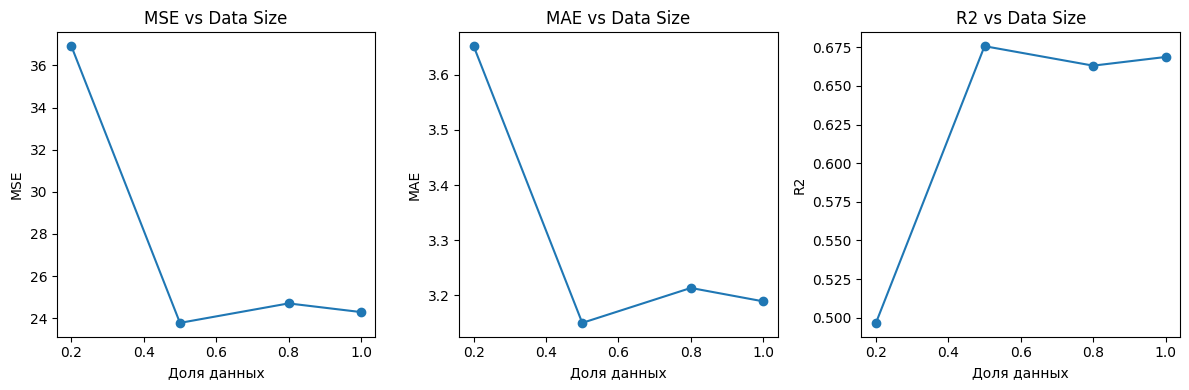

In [25]:
# Визуализация результатов
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(results_size_df['Data Size'], results_size_df['MSE'], marker='o')
plt.title('MSE vs Data Size')
plt.xlabel('Доля данных')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.plot(results_size_df['Data Size'], results_size_df['MAE'], marker='o')
plt.title('MAE vs Data Size')
plt.xlabel('Доля данных')
plt.ylabel('MAE')

plt.subplot(1, 3, 3)
plt.plot(results_size_df['Data Size'], results_size_df['R2'], marker='o')
plt.title('R2 vs Data Size')
plt.xlabel('Доля данных')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

In [26]:
### Часть 2: Влияние количества признаков (столбцов)

# Выберем разное количество признаков
feature_counts = [2, 5, 10, 13]  # Количество признаков
results_features = []

for count in feature_counts:
    # Выбираем подмножество признаков
    X_sub = X_train_scaled[:, :count]
    X_test_sub = X_test_scaled[:, :count]

    # Создаем и обучаем модель
    model = LinearRegression()
    model.fit(X_sub, y_train)

    # Предсказания на тестовых данных
    y_pred = model.predict(X_test_sub)

    # Расчет метрик
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_features.append({
        'Feature Count': count,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })

# Создаем DataFrame с результатами
results_features_df = pd.DataFrame(results_features)
print("\nРезультаты для разного количества признаков:")
print(results_features_df)


Результаты для разного количества признаков:
   Feature Count        MSE       MAE        R2
0              2  47.207373  4.843996  0.356267
1              5  48.825337  4.909617  0.334204
2             10  31.960945  3.639898  0.564172
3             13  24.291119  3.189092  0.668759


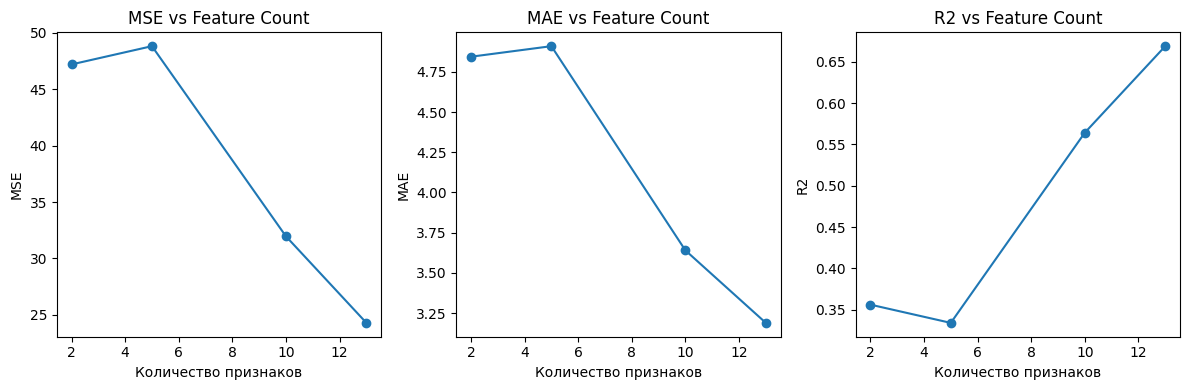

In [27]:
# Визуализация результатов
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(results_features_df['Feature Count'], results_features_df['MSE'], marker='o')
plt.title('MSE vs Feature Count')
plt.xlabel('Количество признаков')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.plot(results_features_df['Feature Count'], results_features_df['MAE'], marker='o')
plt.title('MAE vs Feature Count')
plt.xlabel('Количество признаков')
plt.ylabel('MAE')

plt.subplot(1, 3, 3)
plt.plot(results_features_df['Feature Count'], results_features_df['R2'], marker='o')
plt.title('R2 vs Feature Count')
plt.xlabel('Количество признаков')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

Выводы по исследованию:
1. Влияние количества данных:
   - Увеличение объема данных улучшает качество модели (MSE и MAE уменьшаются, R2 увеличивается).
   - Наибольший прирост качества наблюдается при увеличении данных с 20% до 50%.
   - После 80% данных прирост качества становится менее значительным.

2. Влияние количества признаков:
   - Увеличение количества признаков улучшает качество модели.
   - Наибольший скачок качества происходит при увеличении с 2 до 5 признаков.
   - После 10 признаков прирост качества становится менее заметным, может указывать на наличие менее значимых признаков.



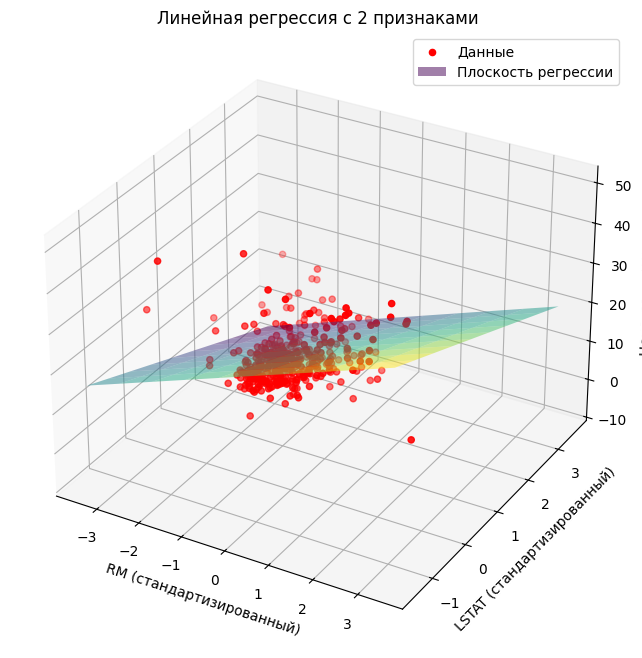

In [32]:
## Задание 2: Визуализация модели с 2 признаками в 3D

# Выберем 2 наиболее значимых признака (RM и LSTAT)
features_2d = ['RM', 'LSTAT']
X_2d = X_train[features_2d].values
y_2d = y_train.values

# Масштабирование данных
scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d)

# Создаем и обучаем модель
model_2d = LinearRegression()
model_2d.fit(X_2d_scaled, y_2d)

# Создаем сетку для визуализации плоскости
x1 = np.linspace(X_2d_scaled[:, 0].min(), X_2d_scaled[:, 0].max(), 10)
x2 = np.linspace(X_2d_scaled[:, 1].min(), X_2d_scaled[:, 1].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1, x2)
X_grid = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))
y_grid = model_2d.predict(X_grid).reshape(x1_grid.shape)

# Визуализация в 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Точки данных
ax.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], y_2d, c='r', marker='o', label='Данные')

# Плоскость регрессии
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, cmap='viridis', label='Плоскость регрессии')

ax.set_xlabel('RM (стандартизированный)')
ax.set_ylabel('LSTAT (стандартизированный)')
ax.set_zlabel('Цена дома (MEDV)')
ax.set_title('Линейная регрессия с 2 признаками')
plt.legend()
plt.show()

In [33]:

# Выведем параметры модели
print("\nПараметры модели с 2 признаками:")
print(f"Коэффициенты: {model_2d.coef_}")
print(f"Интерсепт: {model_2d.intercept_}")
print(f"R2 на обучающих данных: {model_2d.score(X_2d_scaled, y_2d):.3f}")


Параметры модели с 2 признаками:
Коэффициенты: [ 3.87242241 -4.49173636]
Интерсепт: 22.796534653465343
R2 на обучающих данных: 0.650


In [34]:
# Оценка на тестовых данных
X_test_2d = X_test[features_2d].values
X_test_2d_scaled = scaler_2d.transform(X_test_2d)
y_pred_2d = model_2d.predict(X_test_2d_scaled)

print("\nМетрики на тестовых данных:")
print(f"MSE: {mean_squared_error(y_test, y_pred_2d):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_2d):.3f}")
print(f"R2: {r2_score(y_test, y_pred_2d):.3f}")


Метрики на тестовых данных:
MSE: 31.243
MAE: 3.899
R2: 0.574
